# Weapons Analysis in The Legend of Zelda: Breath of the Wild

## Introduction

With the sequel ***The Legend of Zelda: Tears of the Kingdom*** (TotK) newly released and with new items statistics constantly being discovered with ongoing exploration in the new game, I wanted look back at ***The Legend of Zelda: Breath of The Wild*** (BotW) and see if I could conduct data analysis on the 6-year old game. 

The game is rich with data potential around statistics ranging from weapons, to various armor sets with unique set bonuses, to other materials and cooking items. For this analysis however, I wanted to focus on the combat items: weapons, shields, and bows (examples shown below). 

![Weapons](imgs/weapons.jpg)
<figcaption>Weapons Inventory (Source: My Nintendo Switch)</figcaption>

![Shields](imgs/shields.jpg)
<figcaption>Shields Inventory (Source: My Nintendo Switch)</figcaption>

![Bows](imgs/bows.jpg)
<figcaption>Bows Inventory (Source: My Nintendo Switch)</figcaption>

### Context
The operability of these combat items comes down to **2 characteristics:** durability and strength.
- **Durability:** Weapons in BotW do not last forever, they break after certain amount of use, then a new weapon has to be used, and cycle repeats. In the game, durability is the measure of how much you can shoot/or hit an enemy with a weapon or bow; or in the case of shields, how many hits can be endured. Weapons with higher durability last longer before breaking.
- **Strength:** This is associated with attack power. A weapon's strength stat is the damage inflicted upon enemies (meaning that's the amount taken off their health for each hit). The higher the strength, the more damage you can do to enemies.

### The Data Source
The dataset used for this analysis was found from this [reddit post](https://www.reddit.com/r/zelda/comments/6vp63m/a_complete_database_search_for_botw/). This post links to a [database](https://airtable.com/shrI71ZROtt0PXTtr/tblii4AEmQfuzMiWC/viwvh8Oj5fvOkdE2f) where 3 CSV files can be downloaded. The desired data for this analysis is in the `Stuff-Grid view.csv` file; this file has weapon, shield, bow, and armor classes. I renamed it to a more relevant name `BoTW_weapons_inventory.csv`

## Preparation and Processing
First, I start off by importing the libraries I need.

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from itertools import combinations

Then I load the CSV file that I downloaded from the aforementioned source as a dataframe called df. I the one change I made to the CSV file before loading is make the durability of the **Master Sword** 200; this value was initially blank as the weapon does not break, but it does run out of energy and needs to recharge after approximately 200 hits (according to online consensus).

In [2]:
# Import the CSV file
df = pd.read_csv("BoTW_weapons_inventory.csv")

# Get a preview of the dataframe
df

,name,image,class,subclass,tags,durability,strength,range,arrows,defense,...,description,selling_price,bonus_set,upgrade_1,upgrade_2,upgrade_3,upgrade_4,armor_upgrade,where_to_find,notes
0,Ancient Short Sword,BotW_Ancient_Short_Sword_Icon.png?version=486c...,Weapon,Light,NaN,54.0,40.0,NaN,NaN,NaN,...,The blade of this sword was made using an anci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blizzard Rod,BotW_Blizzard_Rod_Icon.png?version=f9bd2bfd010...,Weapon,Light,NaN,32.0,10.0,NaN,NaN,NaN,...,A magical rod that can cast extreme cold in a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boko Club,BotW_Boko_Club_Icon.png?version=e018fd887fdac1...,Weapon,Light,NaN,8.0,4.0,NaN,NaN,NaN,...,A crude Bokoblin club made to clobber small pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bokoblin Arm,BotW_Bokoblin_Arm_Icon.png?version=be25984d7c0...,Weapon,Light,NaN,5.0,5.0,NaN,NaN,NaN,...,A skeletal arm that keeps moving even after it...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boomerang,BotW_Boomerang_Icon.png?version=96318352d5aae4...,Weapon,Light,NaN,18.0,8.0,NaN,NaN,NaN,...,This throwing weapon was originally used by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Trousers of the Wild,BotW_Trousers_of_the_Wild_Icon.png?version=f2a...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,4.0,...,Legends says these pants were tailored for a h...,125.0,Master Sword Beam,"Acorn x10, Farosh's Scale x2","Courser Bee Honey x5, Farosh's Claw x2","Energetic Rhino Beetle x5, Farosh's Fang x2","Star Fragment x1, Farosh's Horn x2","Star Fragment,Acorn,Farosh's Scale,Courser Bee...",Find all 120 Shrines,NaN
280,Trousers of the Wind,BotW_Trousers_of_the_Wind_Icon.png?version=dd8...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,3.0,...,Legends say these trousers were cherished by a...,125.0,Master Sword Beam,"Opal x3, Star Fragment x1","Opal x5, Star Fragment x3","Opal x15, Star Fragment x3","Opal x30, Star Fragment x4","Star Fragment,Opal",Amiibo - Toon/WW Link,NaN
281,Trousers of the Sky,BotW_Trousers_of_the_Sky_Icon.png?version=addb...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,3.0,...,Legends say these trousers were once worn by a...,125.0,Master Sword Beam,"Sapphire x1, Star Fragment x1","Sapphire x3, Star Fragment x2","Sapphire x5, Star Fragment x3","Sapphire x10, Star Fragment x4","Star Fragment,Sapphire",Amiibo -,NaN
282,Well-Worn Trousers,BotW_Well-Worn_Trousers_Icon.png?version=3b33f...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,1.0,...,"These old trousers are threadbare in spots, bu...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,Shrine - Resurrection,NaN


As mentioned before, the primary characteristics that are important to my analysis are the durability and strength of the weapons, shields, and bows. Looking at the table, the only relevant columns in the end are `name`, `class`, `durability`, `strength`. 

Aside from these columns, I also noticed that I do not need any of the rows pertaining to armor sets and arrow types (as damage is attributed to the bow's strength/attack stats).

Finally, going into my data cleaning, there was one item in mind I wanted removed: the **Bow of Light**. This bow is only used in the final stage of the boss fight against Dark Beast Ganon. After beating him, the game resets to before you enter the fight and that bow is not available for outside use anywhere else. Therefore this bow cannot be considered when assessing any meaningful combinations of combat items.

After the unneeded columns, armor and arrow rows, and the Bow of Light were all removed from the dataframe, I removed the `subclass` column (which I initially needed to remove the arrows).

The process of all this is below:

In [3]:
# Drop columns that are not relevant to the analysis
df = df.drop(columns=[
    'range',
    'arrows',
    'image', 
    'tags', 
    'description',
    'where_to_find',
    'notes', 'defense',
    'defense_upgrade_lvl1',
    'defense_upgrade_lvl2', 
    'defense_upgrade_lvl3', 
    'defense_upgrade_lvl4', 
    'bonus', 
    'selling_price',
    'bonus_set',
    'upgrade_1',
    'upgrade_2',
    'upgrade_3',
    'upgrade_4',
    'armor_upgrade'
])

# View
df

,name,class,subclass,durability,strength
0,Ancient Short Sword,Weapon,Light,54.0,40.0
1,Blizzard Rod,Weapon,Light,32.0,10.0
2,Boko Club,Weapon,Light,8.0,4.0
3,Bokoblin Arm,Weapon,Light,5.0,5.0
4,Boomerang,Weapon,Light,18.0,8.0
...,...,...,...,...,...
279,Trousers of the Wild,Armor,Leg,NaN,NaN
280,Trousers of the Wind,Armor,Leg,NaN,NaN
281,Trousers of the Sky,Armor,Leg,NaN,NaN
282,Well-Worn Trousers,Armor,Leg,NaN,NaN


In [4]:
# Remove armor sets, arrows, and the Bow of Light
df = df[df['class'] != 'Armor']
df = df[df['subclass'] != 'Arrow']
df = df[df['name'] != 'Bow of Light']

# View
df

,name,class,subclass,durability,strength
0,Ancient Short Sword,Weapon,Light,54.0,40.0
1,Blizzard Rod,Weapon,Light,32.0,10.0
2,Boko Club,Weapon,Light,8.0,4.0
3,Bokoblin Arm,Weapon,Light,5.0,5.0
4,Boomerang,Weapon,Light,18.0,8.0
...,...,...,...,...,...
181,Steel Lizal Bow,Bow,NaN,50.0,36.0
182,Swallow Bow,Bow,NaN,30.0,9.0
183,Traveler's Bow,Bow,NaN,22.0,5.0
184,Twilight Bow,Bow,NaN,100.0,30.0


In [5]:
# subclass column is no longer relevant and can be removed
df = df.drop(columns=['subclass'])

# View
df

,name,class,durability,strength
0,Ancient Short Sword,Weapon,54.0,40.0
1,Blizzard Rod,Weapon,32.0,10.0
2,Boko Club,Weapon,8.0,4.0
3,Bokoblin Arm,Weapon,5.0,5.0
4,Boomerang,Weapon,18.0,8.0
...,...,...,...,...
181,Steel Lizal Bow,Bow,50.0,36.0
182,Swallow Bow,Bow,30.0,9.0
183,Traveler's Bow,Bow,22.0,5.0
184,Twilight Bow,Bow,100.0,30.0


## Analysis
Four kinds of analysis were carried out in this analysis section. This analysis starts with an overview of the data using **descriptive statistics**, then it explores the relationship between durability and strength through **correlation analysis**, use **comparative analysis** to compare the performance of different item types, and finally, apply **Pareto optimization** to guide the selection of the best combinations. 

### Descriptive Statistics
First off, I wanted to look at the descriptive statistics (the mean, median, standard deviation, minimum, and maximum values) for the durability and strength separately for each type of item (weapons, shields, bows). Doing this conveys the central tendency, variability, and range of the attributes.

To do this, I sorted the data into 3 dataframes by item class: weapons, shields, bows.

In [6]:
# Store weapons, shields, and bows into separate dataframes
weapons = df[df["class"] == "Weapon"]
shields = df[df["class"] == "Shield"]
bows = df[df["class"] == "Bow"]

In [7]:
# Weapons summary
weapons.describe()

,durability,strength
count,127.000000,127.000000
mean,29.622047,22.086614
std,21.158858,16.345974
min,4.000000,1.000000
25%,17.000000,10.000000
50%,26.000000,18.000000
75%,36.000000,30.000000
max,200.000000,78.000000


In [8]:
# Shields summary
shields.describe()

,durability,strength
count,33.000000,33.000000
mean,42.636364,28.545455
std,136.915306,23.792187
min,5.000000,1.000000
25%,12.000000,10.000000
50%,15.000000,22.000000
75%,20.000000,42.000000
max,800.000000,90.000000


In [9]:
# Bows summary
bows.describe()

,durability,strength
count,25.000000,25.0000
mean,42.000000,20.5200
std,24.676237,12.5004
min,16.000000,4.0000
25%,25.000000,12.0000
50%,35.000000,15.0000
75%,50.000000,28.0000
max,120.000000,50.0000


#### Key Takeaways

127 Weapons:
- Durability:
  - The average durability of weapons is approximately 29.62, with a moderate variability (std = 21.16) and a wide range (min = 4, max = 200).
- Strength:
  - The average strength of weapons is approximately 22.09, with a moderate variability (std = 16.35) and a range from 1 to 78.

33 Shields:
- Durability:
  - Shields have an average durability of approximately 42.64, with a high variability (std = 136.92) and a wide range (min = 5, max = 800).
- Strength:
  - The average strength of shields is approximately 28.55, with a moderate variability (std = 23.79) and a range from 1 to 90.

25 Bows:
- Durability:
  - Bows have an average durability of approximately 42.0, with a moderate variability (std = 24.68) and a range from 16 to 120.
- Strength:
  - The average strength of bows is approximately 20.52, with a moderate variability (std = 12.5) and a range from 4 to 50.

Comparing the durability and strength characteristics between the combat item classes:
- Durability:
  - Shields have the highest average durability (42.64), followed by bows (42.0), and then weapons (29.62).
  - Shields also have the highest maximum durability (800, a possible outlier), while weapons have the lowest (200).
- Strength:
  - Shields have the highest average strength (28.55), followed by weapons (22.09), and then bows (20.52).
  - Shields also have the highest maximum strength (90), while bows have the lowest (50).

Overall, shields tend to have higher durability and strength values compared to weapons and bows. Weapons have moderate durability and strength values, while bows generally have slightly lower values in both categories. 

### Correlation Analysis
I then wanted to look into the relationship between durability and strength even further by exploring the correlation between them for each type of item.

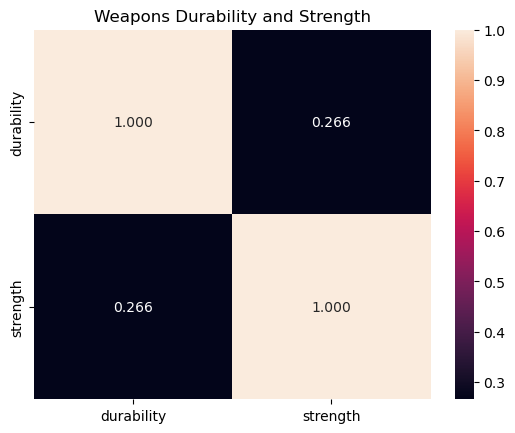

In [10]:
# Weapon heatmap
# Select the columns 'durability' and 'strength' from the 'weapons' DataFrame
dfcorr = weapons[['durability', 'strength']]

# Compute the correlation matrix using Pearson's correlation coefficient
correlation_matrix = dfcorr.corr(method='pearson')

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, fmt=".3f", annot=True)

# Set the title of the plot
plt.title('Weapons Durability and Strength')

# Display the plot
plt.show()

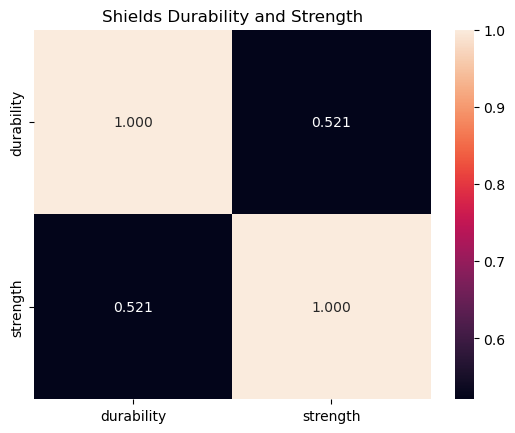

In [11]:
#  Shield heatmap
dfcorr = shields[['durability', 'strength']]
correlation_matrix = dfcorr.corr(method='pearson')
sns.heatmap(correlation_matrix, fmt=".3f", annot=True)
plt.title('Shields Durability and Strength')
plt.show()

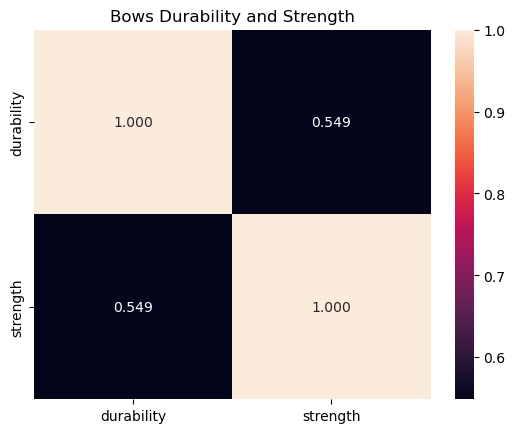

In [12]:
#  Bow heatmap
dfcorr = bows[['durability', 'strength']]
correlation_matrix = dfcorr.corr(method='pearson')
sns.heatmap(correlation_matrix, fmt=".3f", annot=True)
plt.title('Bows Durability and Strength')
plt.show()

The correlation coefficients between durability and strength in the weapons, shields, and bows matrices indicate the strength of the linear relationship between these variables within each category. Weapons show a weak positive correlation (0.266), while shields and bows exhibit moderate positive correlations (0.521 and 0.549, respectively). This suggests that higher durability is somewhat associated with higher strength in shields and bows, but the relationship is not as strong in weapons.

**Scatter plots** can be used to better visualize the relationship between durability and strength. Each point represents an item, and the x-axis represents durability while the y-axis represents strength. Colors distinguish between weapons, shields, and bows:

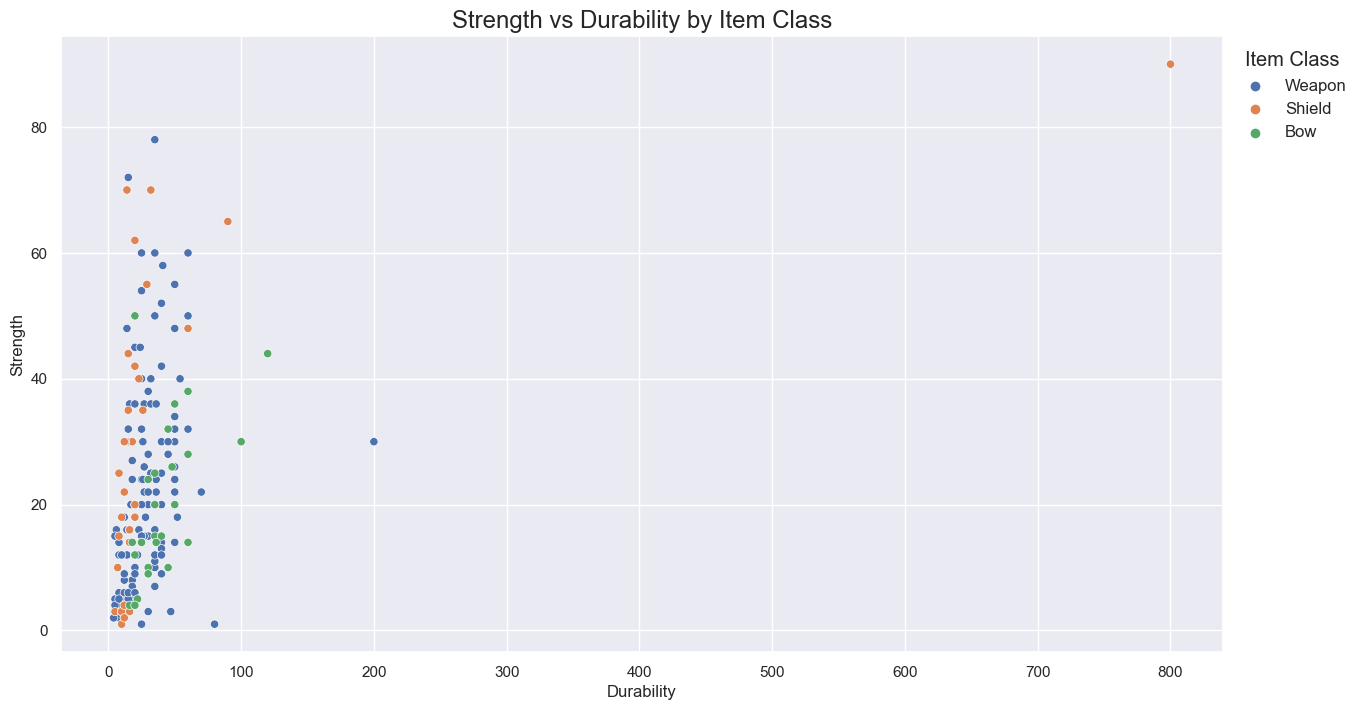

In [13]:
sns.set_theme()  # Set the plot theme for Seaborn
plt.figure(figsize=(15, 8))  # Set the dimensions of the plot

# Create the scatterplot
scatterplot = sns.scatterplot(data=df, x='durability', y='strength', hue='class')

plt.title('Strength vs Durability by Item Class', fontsize='x-large')  # Set the title of the plot
plt.xlabel('Durability')  # Set the label for the x-axis
plt.ylabel('Strength')  # Set the label for the y-axis

# Set the title and appearance of the legend
scatterplot.legend(
    title='Item Class',  # Set the title of the legend
    loc='upper left',  # Set the location of the legend
    bbox_to_anchor=(1, 1),  # Adjust the position of the legend using anchor coordinates
    frameon=False,  # Remove the legend frame
    title_fontsize='large',  # Set the font size of the legend title
    fontsize='medium'  # Set the font size of the legend labels
)

plt.show()  # Display the plot

The plot is heavily skewed by one outlier that is a shield. The presence of this outlier was indicated in the descriptive statistics earlier in the analysis where the shields had the highest maximum durability and maximum strength value of all classes; 800. The item in question is the **Hylian Shield**, the main character Link's legendary shield with defensive capabilities and durability outshining all other shields. The Hylian Shield is a very popular item in the game and therefore valid data unlike the Bow of Light.

Even with this outlier it is visible in the main cluster of points that shields are grouped more to the left in the overall grouping, bows are more visible to the right, while weapons are more evenly distributed in the cluster. 

To get a better look, I adjusted the scale of the axes to a logarithmic scale since the outlier is still valid data despite having extreme values:

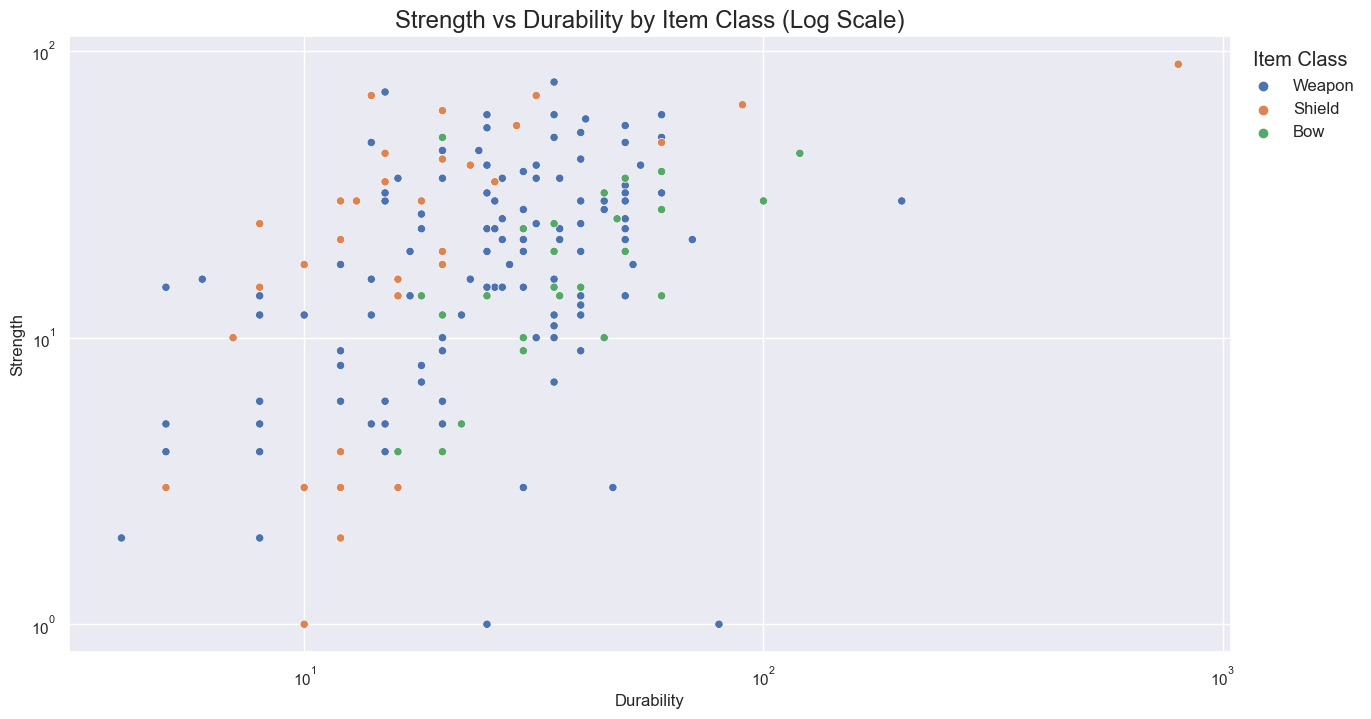

In [14]:
sns.set_theme()  # Set the plot theme for Seaborn
plt.figure(figsize=(15, 8))  # Set the dimensions of the plot

# Create the scatterplot
scatterplot = sns.scatterplot(data=df, x='durability', y='strength', hue='class')

plt.xscale('log')  # Adjust the x-axis scale to logarithmic
plt.yscale('log')  # Adjust the y-axis scale to logarithmic
plt.title('Strength vs Durability by Item Class (Log Scale)', fontsize='x-large')  # Set the title of the plot
plt.xlabel('Durability')  # Set the label for the x-axis
plt.ylabel('Strength')  # Set the label for the y-axis

# Set the title and appearance of the legend
scatterplot.legend(
    title='Item Class',  # Set the title of the legend
    loc='upper left',  # Set the location of the legend
    bbox_to_anchor=(1, 1),  # Adjust the position of the legend using anchor coordinates
    frameon=False,  # Remove the legend frame
    title_fontsize='large',  # Set the font size of the legend title
    fontsize='medium'  # Set the font size of the legend labels
)

plt.show()  # Display the plot

I adjusted the scale of both the x-axis and y-axis to logarithmic using `plt.xscale('log')` and `plt.yscale('log')`. By using a logarithmic scale, extreme values are compressed, and the overall distribution of the data can be better visualized. 

#### Key Takeaway
As indicated earlier, it is clear that within the main cluster, shields are grouped more to the left while bows are grouped more to the right relative to each other. This means that in the relationship between durability and strength, shields generally are a bit more favorable to strength while bows trend more in favor of durability. Weapons are more evenly dispersed (albeit with a very slight lean towards durability) within the main cluster.

### Comparative Analysis

To build upon the findings at end of the correlation analysis, I wanted to compare the average durability and strength values across different types of items (weapons, shields, bows). This analysis helps identify which type tends to have higher or lower durability/strength on average and provides insights into their relative performance.

For this analysis, grouped box plots can be used to compare the average durability and strength across different types of items:

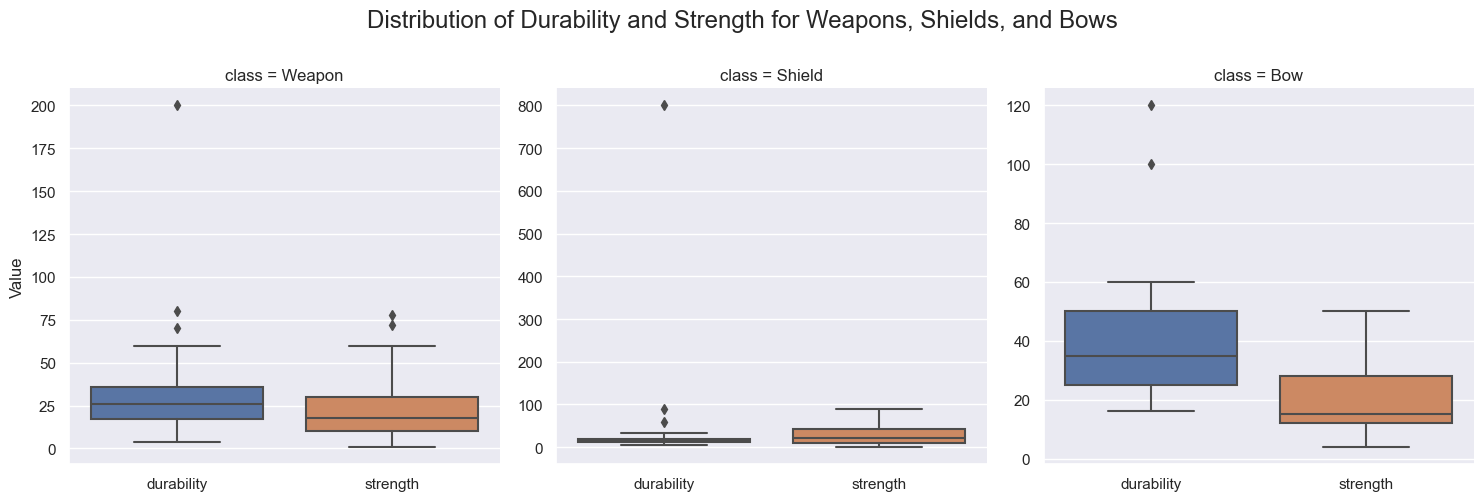

In [15]:
# Create the catplot
catplot = sns.catplot(data=df, kind='box', col='class', sharey=False)

# Set the title above the catplot
catplot.fig.suptitle('Distribution of Durability and Strength for Weapons, Shields, and Bows',fontsize='x-large', y=1)

# Set labels for the axes
catplot.set_axis_labels('','Value')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

The outliers in the grouped box plot shown above make it difficult to compare the different classes, especially for the shield plot due to the Hylian Shield. Since the purpose of this analysis is to compare the average durability and strength values, there isn't much need for the outliers being present. This analysis only will look at the general distribution within the box plots.

To do this, simple add `showfliers = False` to the catplot parameters. The y-axis will also be standardized to make comparative analysis easier by setting `sharey = True`:

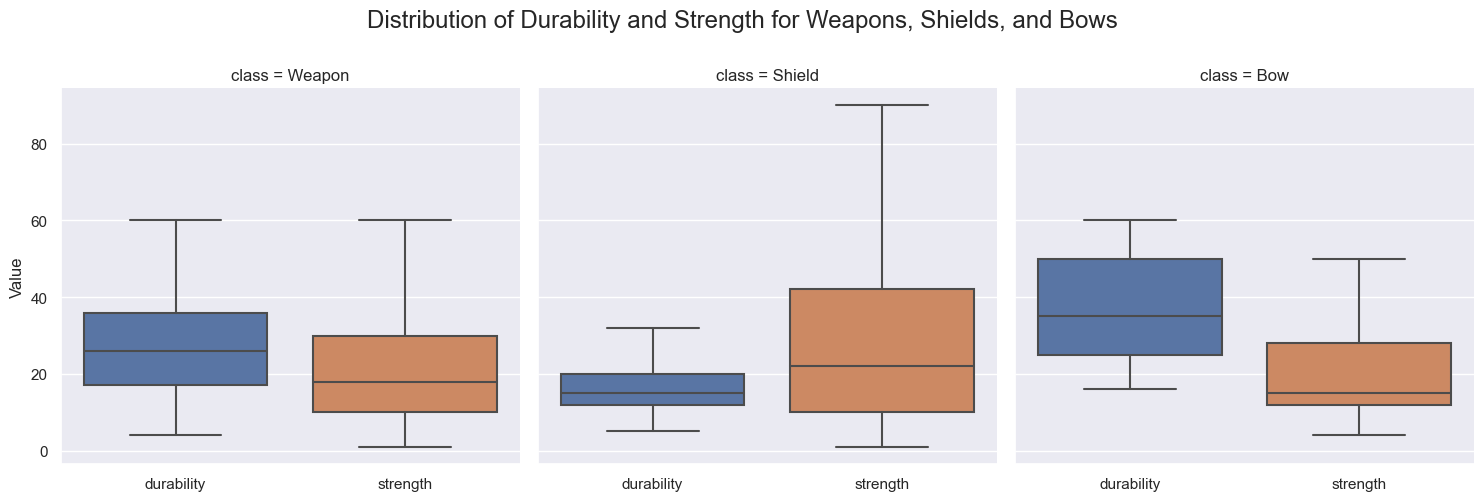

In [16]:
# Create the catplot
# Make showfliers=False to remove outliers, standardize the y-axis by making sharey=True
catplot = sns.catplot(data=df, kind='box', col='class', sharey=True, showfliers=False)

# Set the title above the catplot
catplot.fig.suptitle('Distribution of Durability and Strength for Weapons, Shields, and Bows', fontsize='x-large', y=1)

# Set labels for the axes
catplot.set_axis_labels('','Value')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### Key Takeaways
With a clearer look at the distribution of average durability and strength in the grouped box plot, the key takeaway in the correlation analysis earlier is reinforced:
- **Weapons** seem to be relatively more balanced with their average durability and strength distributions.
- For **shields**, even though strength has a lower minimum compared durability, its much higher spread gives it a notably higher average strength over durability.
- **Bows** trend in the other direction compared to shields; the have a distinctly higher average for durability than strength. 


### Pareto Optimization
The comparative analysis further supported initial findings that on average, shields favor strength more than durability, bows favor durability, and weapons are a bit more balanced albeit trending slightly more towards durability. With these findings I wanted to find the ideal combinations of these combat items. To do this I decided to apply **Pareto optimization**. 

Pareto optimization, also known as Pareto efficiency, is a concept in multi-objective optimization that aims to find solutions that are optimal with respect to multiple conflicting objectives. It involves identifying a set of solutions, called the **Pareto frontier**, that represent the best trade-offs among the objectives. These solutions cannot be improved in one objective without worsening another. Pareto optimization is used in various domains such as engineering, resource allocation, portfolio optimization, decision making, and environmental sustainability to make informed decisions and find the best possible compromises among competing objectives.

In the context of analyzing combat items in BoTW, Pareto optimization can help identify the best weapon, shield, and bow combinations that achieve a balance between durability and strength. By exploring the Pareto frontier, which represents the set of non-dominated solutions, players can strategically select combat items that offer the best possible trade-offs between durability and strength.

#### Weapon and Shield Combinations
I first explored weapons and shield combinations because I wanted to start with a code that has less combinations to cycle through every time I run it. These combinations are still useful for if the player is in a predominantly melee engagement that focuses on flurry rush attacks. 

A detailed breakdown of the code for the weapon and shield combinations and their resulting Pareto frontier can be found in the **Appendix** section at the end of very end. 

The code below resulted in 4191 combinations for the 127 weapons and 33 shields:

In [17]:
# Concatenate the "weapons" and "shields" DataFrames into a single DataFrame
weapons_shields = pd.concat([weapons, shields], ignore_index=True)

# Set the "name" column as the index of the DataFrame
# This allows for easy lookup and retrieval of item information using the name as the key
df2 = weapons_shields.set_index("name", drop=False)

# Create empty lists and variables for storing data and combinations
data = []
combos = list(combinations(df2.index, 2))
valid_combos = []

# Iterate over all combinations of names in the DataFrame
for combo in combos:
    # Check if the "class" value of the first name is different from the second name
    # This ensures that only combinations of items with different classes are considered (1 weapon, 1 shield)
    if df2.loc[combo[0], "class"] != df2.loc[combo[1], "class"]:
        # Add the valid combo to the list of valid combos
        valid_combos.append(combo)
        
        # Calculate the average durability and strength for the combination
        # This is done by taking the mean of the durability and strength values of the two items in the combination
        data_line = []
        data_line.append(np.mean([df2.loc[combo[0], "durability"], df2.loc[combo[1], "durability"]]))
        data_line.append(np.mean([df2.loc[combo[0], "strength"], df2.loc[combo[1], "strength"]]))
        
        # Add the data line to the list of data
        data.append(data_line)
    
# Create a new DataFrame with the data and index of valid combinations
# This DataFrame represents the combinations of items with different classes and their average durability and strength
combos = pd.DataFrame(data, columns=['durability', 'strength'], index=valid_combos)

# View
combos

,durability,strength
"(Ancient Short Sword, Ancient Shield)",43.0,55.0
"(Ancient Short Sword, Boko Shield)",29.5,21.5
"(Ancient Short Sword, Daybreaker)",57.0,44.0
"(Ancient Short Sword, Dragonbone Boko Shield)",31.0,32.5
"(Ancient Short Sword, Emblazoned Shield)",33.0,21.5
...,...,...
"(Zora Spear, Soldier's Shield)",28.0,12.5
"(Zora Spear, Spiked Boko Shield)",23.5,9.5
"(Zora Spear, Steel Lizal Shield)",27.5,22.0
"(Zora Spear, Traveler's Shield)",26.0,6.5


Below is the visualization of the Pareto frontier for the weapon and shield combinations:

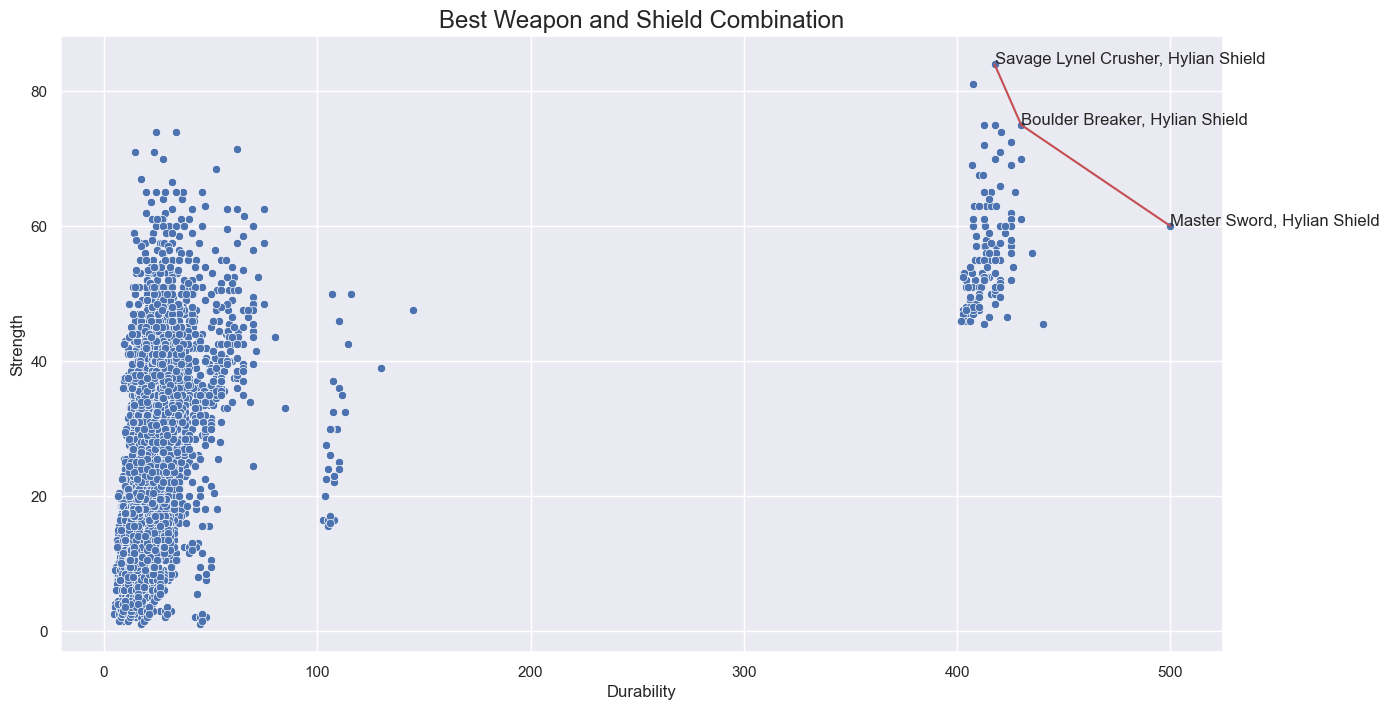

In [18]:
# Set the plot theme for Seaborn
sns.set_theme()

# Set the dimensions of the plot
plt.figure(figsize=(15,8)) 

# Set the title of the plot
plt.title('Best Weapon and Shield Combination', fontsize='x-large')

# Create a scatter plot with durability on the x-axis and strength on the y-axis
sctplot = sns.scatterplot(data=combos, x='durability', y='strength')

# Find the Pareto frontier
pareto_frontier = []
for idx, point in combos.iterrows():
    durability = point['durability']
    strength = point['strength']
    is_pareto_dominated = False
    # Iterate over all other points to check if the current point is dominated
    for _, other_point in combos.iterrows():
        other_durability = other_point['durability']
        other_strength = other_point['strength']
        # Check if the current point is dominated by any other point in terms of durability and strength
        if (other_durability > durability and other_strength >= strength) or (other_durability >= durability and other_strength > strength):
            is_pareto_dominated = True
            break
    if not is_pareto_dominated:
        # Add the non-dominated point to the Pareto frontier
        pareto_frontier.append((durability, strength))

# Add labels for points on the Pareto frontier
for point in pareto_frontier:
    # Get the corresponding weapon and shield combination for the point
    weapon_shield_combo = combos.loc[(combos['durability'] == point[0]) & (combos['strength'] == point[1])]
    weapon = weapon_shield_combo.index[0][0]
    shield = weapon_shield_combo.index[0][1]
    label = f'{weapon}, {shield}'
    plt.text(point[0], point[1], label)  # Add the label to the point

# Add lines connecting points on the Pareto frontier
x_vals = [point[0] for point in pareto_frontier]
y_vals = [point[1] for point in pareto_frontier]
plt.plot(x_vals, y_vals, 'r-')  # Plot lines connecting the points on the Pareto frontier

plt.xlabel('Durability')  # Set the label for the x-axis
plt.ylabel('Strength')  # Set the label for the y-axis

plt.show()  # Display the plot

The combinations on the frontier (in order favoring durability to favoring strength) are:
1. Master Sword, Hylian Shield
2. Boulder Breaker, Hylian Shield
3. Savage Lynel Crusher, Hylian Shield

Given the findings in the previous analyses, it is no surprise that the **Hylian Shield** the chosen shield for all the combinations on the frontier. It's high strength and overwhelming durability stats made it a noticeable outlier right away.

In a given engagement, if a player wants to use items that last longer (which makes durability more important), then the **Master Sword/Hylian Shield** combination is more suitable. However, if a player wants to prioritize inflicting damage to the enemy (which makes strength more important), then the **Savage Lynel Crusher/Hylian Shield** combination would be better.

#### Weapon, Shield, Bow Combinations
After being satisfied with the weapons and shield combinations I explored combinations of all 3 combat item types. I revised the code of the weapon and shield combinations to add in bows. These combinations are useful if players find themselves in engagements that have both melee and ranged components; requiring weapons and shields as well as bows.

127 weapons, 33 shields, and 25 bows resulted in 104,775 combinations:

In [19]:
# Concatenate the weapons, shields, and bows dataframes into a single dataframe
weapons_shields_bows = pd.concat([weapons, shields, bows], ignore_index=True)

# Set the index of the dataframe to the "name" column
df3 = weapons_shields_bows.set_index("name", drop=False)  

# Create an empty list to store the data
data = []  

# Generate combinations of three elements from the index of the dataframe
combos = list(combinations(df3.index, 3))  

# Create an empty list to store the valid combinations
valid_combos = []  

for combo in combos:
    # Check if the classes of the three combinations are different
    if (
        df3.loc[combo[0], "class"] != df3.loc[combo[1], "class"]
        and df3.loc[combo[0], "class"] != df3.loc[combo[2], "class"]
        and df3.loc[combo[1], "class"] != df3.loc[combo[2], "class"]
    ):
        valid_combos.append(combo)  # Add the valid combination to the list
        data_line = []  # Create an empty list to store the data for the combination
        # Calculate the mean of the durability and strength values for the three combinations and add them to the data list
        data_line.append(np.mean([df3.loc[combo[0], "durability"], df3.loc[combo[1], "durability"], df3.loc[combo[2], "durability"]]))
        data_line.append(np.mean([df3.loc[combo[0], "strength"], df3.loc[combo[1], "strength"], df3.loc[combo[2], "strength"]]))
        data.append(data_line)  # Add the data for the combination to the main data list

# Create a new dataframe with the combined data and valid combinations
combos = pd.DataFrame(data, columns=['durability', 'strength'], index=valid_combos)
combos

,durability,strength
"(Ancient Short Sword, Ancient Shield, Ancient Bow)",68.666667,51.333333
"(Ancient Short Sword, Ancient Shield, Boko Bow)",34.000000,38.000000
"(Ancient Short Sword, Ancient Shield, Dragon Bone Boko Bow)",38.666667,44.666667
"(Ancient Short Sword, Ancient Shield, Duplex Bow)",34.666667,41.333333
"(Ancient Short Sword, Ancient Shield, Falcon Bow)",45.333333,43.333333
...,...,...
"(Zora Spear, Wooden Shield, Steel Lizal Bow)",34.000000,15.666667
"(Zora Spear, Wooden Shield, Swallow Bow)",27.333333,6.666667
"(Zora Spear, Wooden Shield, Traveler's Bow)",24.666667,5.333333
"(Zora Spear, Wooden Shield, Twilight Bow)",50.666667,13.666667


Below is the visualization of the Pareto frontier for the weapon, shield, and bow combinations:

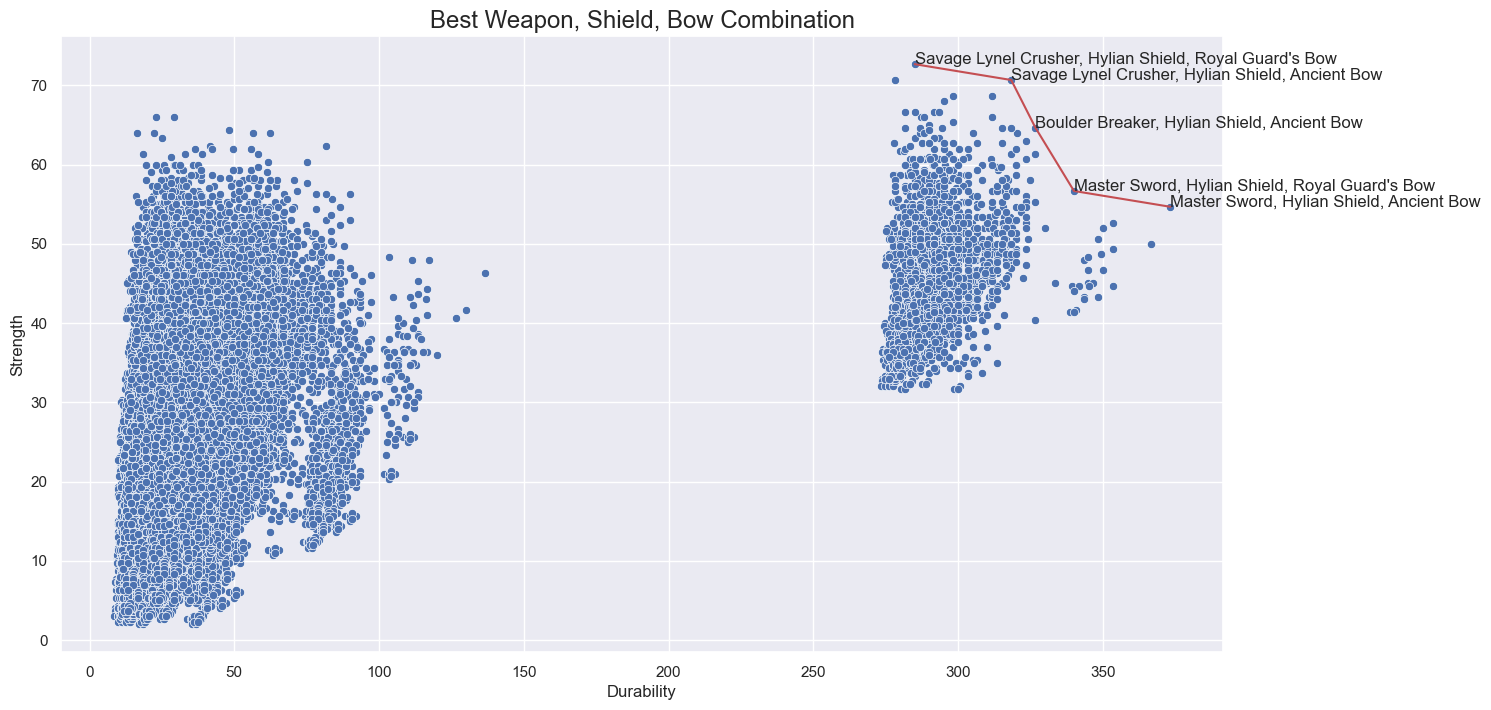

In [20]:
# Set the default theme for the plot
sns.set_theme()

plt.figure(figsize=(15, 8))  # Create a new figure with specified dimensions
plt.title('Best Weapon, Shield, Bow Combination', fontsize='x-large')  # Set the title of the plot

# Create a scatter plot using the durability and strength data
sctplot = sns.scatterplot(data=combos, x='durability', y='strength')  

# Find Pareto frontier
pareto_frontier = []  # Create an empty list to store points on the Pareto frontier
for idx, point in combos.iterrows():
    durability = point['durability']
    strength = point['strength']
    is_pareto_dominated = False
    for _, other_point in combos.iterrows():
        other_durability = other_point['durability']
        other_strength = other_point['strength']
        # Check if the current point is dominated by any other point
        if (other_durability > durability and other_strength >= strength) or (
                other_durability >= durability and other_strength > strength):
            is_pareto_dominated = True
            break
    if not is_pareto_dominated:
        pareto_frontier.append((durability, strength))  # Add the point to the Pareto frontier list

# Add labels for points on the Pareto frontier
for point in pareto_frontier:
    weapon_shield_bow_combo = combos.loc[
        (combos['durability'] == point[0]) & (combos['strength'] == point[1])]
    weapon = weapon_shield_bow_combo.index[0][0]
    shield = weapon_shield_bow_combo.index[0][1]
    bow = weapon_shield_bow_combo.index[0][2]
    label = f'{weapon}, {shield}, {bow}'  # Create a label with the weapon, shield, and bow names
    plt.text(point[0], point[1], label)  # Add the label to the corresponding point on the plot

# Add lines connecting points on the Pareto frontier
x_vals = [point[0] for point in pareto_frontier]  # Extract the x-values of the points on the Pareto frontier
y_vals = [point[1] for point in pareto_frontier]  # Extract the y-values of the points on the Pareto frontier
plt.plot(x_vals, y_vals, 'r-')  # Plot lines connecting the points on the Pareto frontier

plt.xlabel('Durability')  # Set the label for the x-axis
plt.ylabel('Strength')  # Set the label for the y-axis
plt.show()  # Display the plot

The combinations on the frontier (in order favoring durability to favoring strength) are:
1. Master Sword, Hylian Shield, Ancient Bow
2. Master Sword, Hylian Shield, Royal Guard's Bow
3. Boulder Breaker, Hylian Shield, Ancient Bow
4. Savage Lynel Crusher, Hylian Shield, Ancient Bow
5. Savage Lynel Crusher, Hylian Shield, Royal Guard's Bow

If the player find themselves in a prolonged engagement that makes durability more important (like multi-stage boss battle), then the **Master Sword/Hylian Shield/Ancient Bow** combination is the most suitable. If a player however, find themselves against an enemy with large health bar, and wants to focus more on inflicting damage, then the **Savage Lynel Crusher/Hylian Shield/Royal Guard's Bow** combination is the best at prioritizing strength and attack power.

## Conclusions
In my analysis, I started with an overview of the data using **descriptive statistics**, explored the relationship between durability and strength through **correlation analysis**, used **comparative analysis** to compare the performance of different item types, and finally, applied **Pareto optimization** to guide the selection of the best combinations. The findings for each analysis are as follows:

### Descriptive statistics:
- Shields have the highest average durability (42.64), followed by bows (42.0), and then weapons (29.62).
- Shields have the highest average strength (28.55), followed by weapons (22.09), and then bows (20.52).

### Correlation analysis:
- In the relationship between durability and strength, **shields generally are a bit more favorable to strength** while **bows trend more in favor of durability**. 
- **Weapons are more evenly dispersed** (albeit with a very slight lean towards durability).

### Comparative analysis:
- Reinforces findings in the correlation analysis.
- **Weapons are relatively balanced** with their average durability and strength distributions.
- **Shields** have a higher spread for strength, giving it a notably **higher average strength over durability**.
- **Bows** trend in the other direction compared to shields; the **have a distinctly higher average for durability than strength**.

### Pareto optimization:
For melee engagements using a weapon and shield:
- The **Master Sword/Hylian Shield** combination prioritizes durability and will last longer in battle.
- The **Savage Lynel Crusher/Hylian Shield** combination prioritizes strength and will inflict more damage against enemies.

For engagements that have a ranged component and would need the addition of a bow to the player's weapon and shield:
- The **Master Sword/Hylian Shield/Ancient Bow** combination is the most durability-favored combination, best for prolonged engagements that will need longer lasting combat items.
- The **Savage Lynel Crusher/Hylian Shield/Royal Guard's Bow** combination is the most strength-favored combination, best for prioritizing raw damage and attack power against enemies.

## Appendix

#### Breakdown of the weapons and shield combinations code:
1. `weapons_shields = pd.concat([weapons, shields], ignore_index=True)`
   - Concatenates the `weapons` and `shields` DataFrames into a single DataFrame called `weapons_shields`. The `ignore_index=True` parameter resets the index of the resulting DataFrame.

2. `df2 = weapons_shields.set_index("name", drop=False)`
   - Sets the index of the `weapons_shields` DataFrame to the "name" column. The `drop=False` parameter ensures that the "name" column is retained as a separate column in the DataFrame.

3. `data = []`
   - Initializes an empty list called `data` to store the calculated data points.

4. `combos = list(combinations(df2.index, 2))`
   - Generates all possible combinations of pairs of indices from the `df2` DataFrame. It uses the `combinations` function from the `itertools` module to generate these combinations.

5. `valid_combos = []`
   - Initializes an empty list called `valid_combos` to store the valid combinations that meet the specified condition.

6. `for combo in combos:`
   - Starts a loop that iterates over each combination in the `combos` list.

7. `if df2.loc[combo[0], "class"] != df2.loc[combo[1], "class"]:`
   - Checks if the "class" value of the first index (`combo[0]`) is not equal to the "class" value of the second index (`combo[1]`).

8. `valid_combos.append(combo)`
   - Adds the current combination (`combo`) to the `valid_combos` list if it meets the condition.

9. `data_line = []`
   - Initializes an empty list called `data_line` to store the data points for a valid combination.

10. `data_line.append(np.mean([df2.loc[combo[0], "durability"], df2.loc[combo[1], "durability"]]))`
    - Calculates the mean durability value for the two items in the current valid combination and appends it to `data_line`.

11. `data_line.append(np.mean([df2.loc[combo[0], "strength"], df2.loc[combo[1], "strength"]]))`
    - Calculates the mean strength value for the two items in the current valid combination and appends it to `data_line`.

12. `data.append(data_line)`
    - Appends the `data_line` list (containing the mean durability and strength values) to the `data` list.

13. `combos = pd.DataFrame(data, columns=['durability', 'strength'], index=valid_combos)`
    - Creates a new DataFrame called `combos` using the `data` list. The mean durability and strength values are used as columns, and the `valid_combos` list is set as the index for the DataFrame.

In summary, this code block combines the `weapons` and `shields` DataFrames, generates valid combinations of pairs of items with different classes, calculates the mean durability and strength values for each valid combination, and stores the results in a new DataFrame called `combos`.

#### Breakdown of the Pareto frontier on the weapon and shield combination plot:
1. `pareto_frontier = []`
   - Initializes an empty list called `pareto_frontier` to store the points on the Pareto frontier.

2. `for idx, point in combos.iterrows():`
   - Starts a loop that iterates over each row in the `combos` DataFrame.

3. `durability = point['durability']` and `strength = point['strength']`
   - Extract the durability and strength values from the current row of the `combos` DataFrame.

4. `is_pareto_dominated = False`
   - Initializes a boolean variable `is_pareto_dominated` to keep track of whether the current point is dominated by any other point.

5. `for _, other_point in combos.iterrows():`
   - Starts an inner loop that iterates over each row in the `combos` DataFrame again to compare the current point with other points.

6. `other_durability = other_point['durability']` and `other_strength = other_point['strength']`
    - Extract the durability and strength values from the other points being compared.

7. `if (other_durability > durability and other_strength >= strength) or (other_durability >= durability and other_strength > strength):`
    - Checks if the current point is dominated by any other point by comparing their durability and strength values. If the current point is dominated, the `is_pareto_dominated` variable is set to `True` and the inner loop is exited.

8. `if not is_pareto_dominated:`
    - Checks if the current point is not dominated by any other point.

9. `pareto_frontier.append((durability, strength))`
    - Adds the current point (durability, strength) to the `pareto_frontier` list if it is not dominated by any other point.

10. `for point in pareto_frontier:`
    - Starts a loop that iterates over each point in the `pareto_frontier` list.

11. `weapon_shield_combo = combos.loc[(combos['durability'] == point[0]) & (combos['strength'] == point[1])]`
    - Locates the row in the `combos` DataFrame that matches the current point's durability and strength values.

12. `weapon = weapon_shield_combo.index[0][0]` and `shield = weapon_shield_combo.index[0][1]`
    - Extract the weapon and shield values from the index of the located row.

13. `label = f'{weapon}, {shield}'`
    - Creates a label for the current point by combining the weapon and shield values.

14. `plt.text(point[0], point[1], label)`
    - Adds a text label to the plot at the coordinates specified by the current point, displaying the label created in the previous step.

15. `x_vals = [point[0] for point in pareto_frontier]` and `y_vals = [point[1] for point in pareto_frontier]`
    - Extract the x (durability) and y (strength) values from the points in the `pareto_frontier` list and assign them to `x_vals` and `y_vals`, respectively.

16. `plt.plot(x_vals, y_vals, 'r-')`
    - Plots the Pareto frontier by connecting the points specified by `x_vals` and `y_vals` with a red line.

17. `plt.xlabel('Durability')` and `plt.ylabel('Strength')`
    - Set the labels for the x-axis and y-axis, respectively.

In summary, this code block generates a scatter plot based on the `combos` DataFrame, identifies the points on the Pareto frontier by comparing durability and strength values, and visualizes the Pareto frontier by plotting the points and connecting them with a line.